In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import matplotlib

In [3]:
import champy.plot_chameleon as plt_chi
import champy.sim_chameleon as sim_chi
import champy.runs_chameleon as run_chi
import champy.units as units

/home/users/vrastil/GIT/chi_r_solver/scripts/champy/plot_chameleon.py:7: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('PS', warn=False)


# All-in-one

Running STAR-like simulation (potential)
Running simulation 1/3
Running simulation 2/3
Running simulation 3/3
Waiting for subprocesses to finish (3/3)
Saving results
Plot and save.


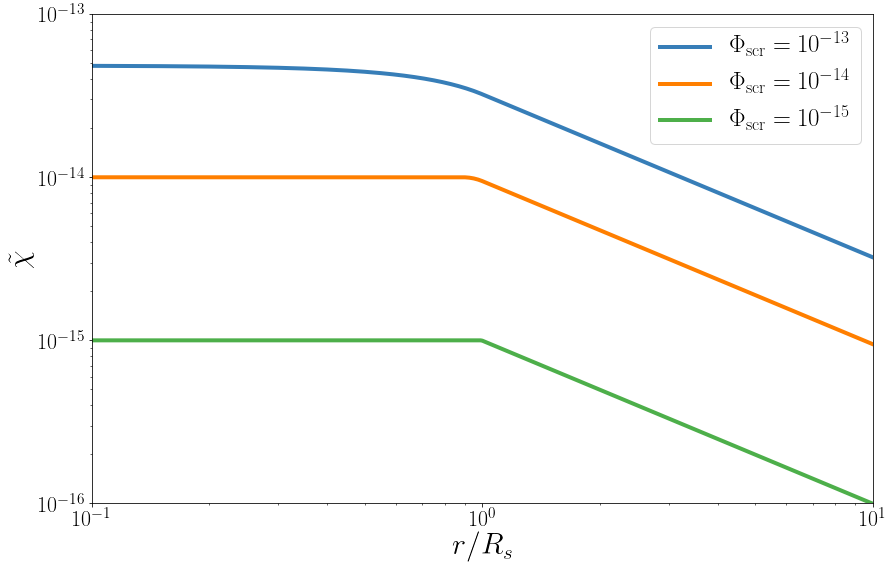

Running STAR-like simulation (forces)
Running simulation 1/6
Running simulation 2/6
Running simulation 3/6
Running simulation 4/6
Running simulation 5/6
Running simulation 6/6
Waiting for subprocesses to finish (6/6)
Saving results
Plot and save.


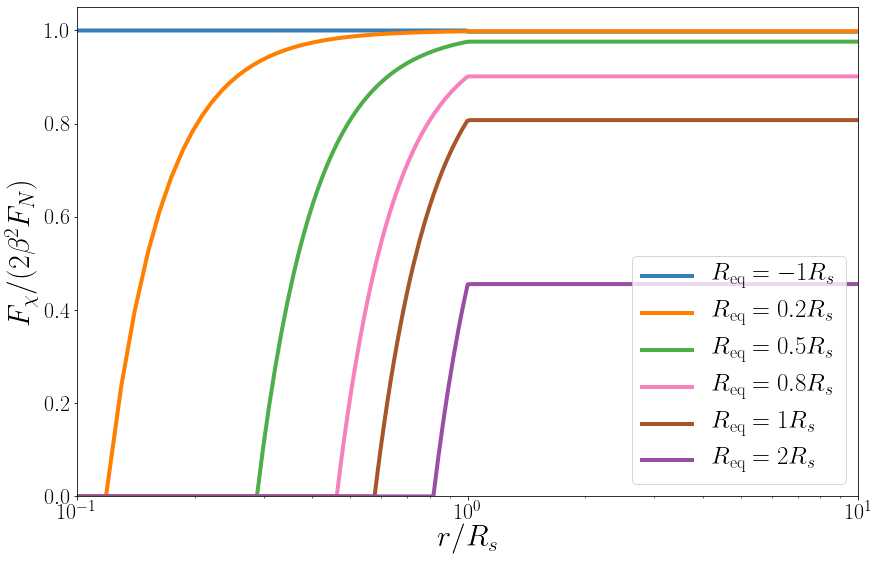

Running NFW-like simulation (forces)
Running simulation 1/5
Running simulation 2/5
Running simulation 3/5
Running simulation 4/5
Running simulation 5/5
Waiting for subprocesses to finish (5/5)
Saving results
Plot and save.


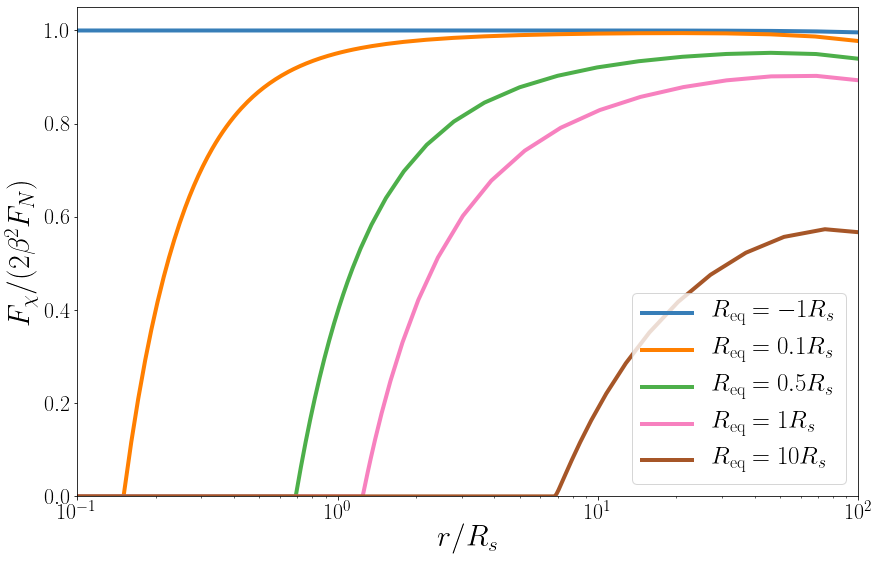

Running NFW-like simulation (potential)
Running simulation 1/9
Running simulation 2/9
Running simulation 3/9
Running simulation 4/9
Running simulation 5/9
Running simulation 6/9
Running simulation 7/9
Running simulation 8/9
Running simulation 9/9
Waiting for subprocesses to finish (9/9)
Saving results
Plot and save.


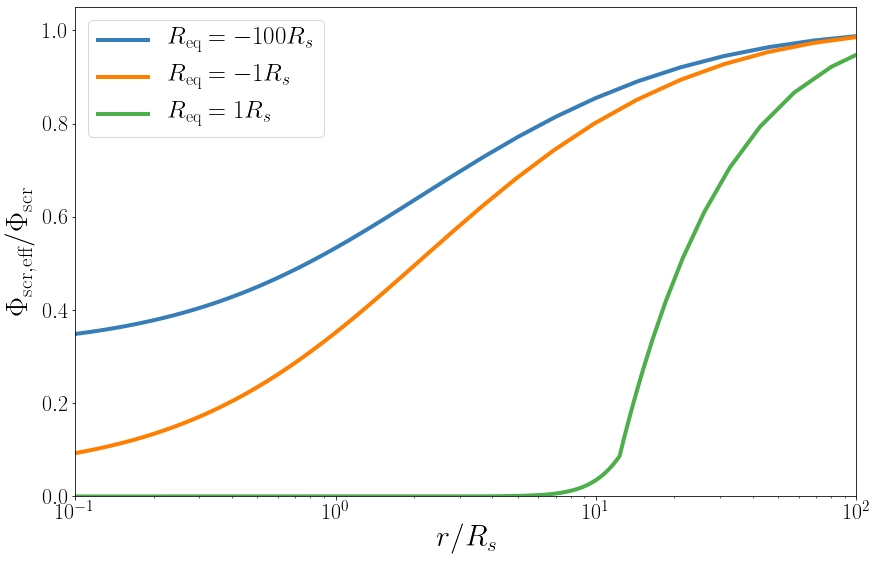

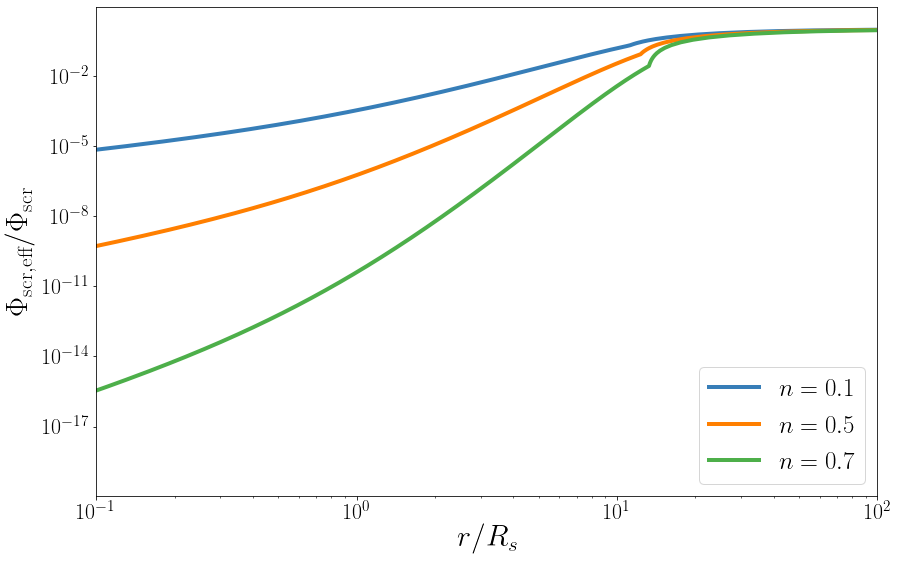

Running cluster simulation (effective mass)
Running simulation 1/5
Running simulation 2/5
Running simulation 3/5
Running simulation 4/5
Running simulation 5/5
Waiting for subprocesses to finish (5/5)
Saving results


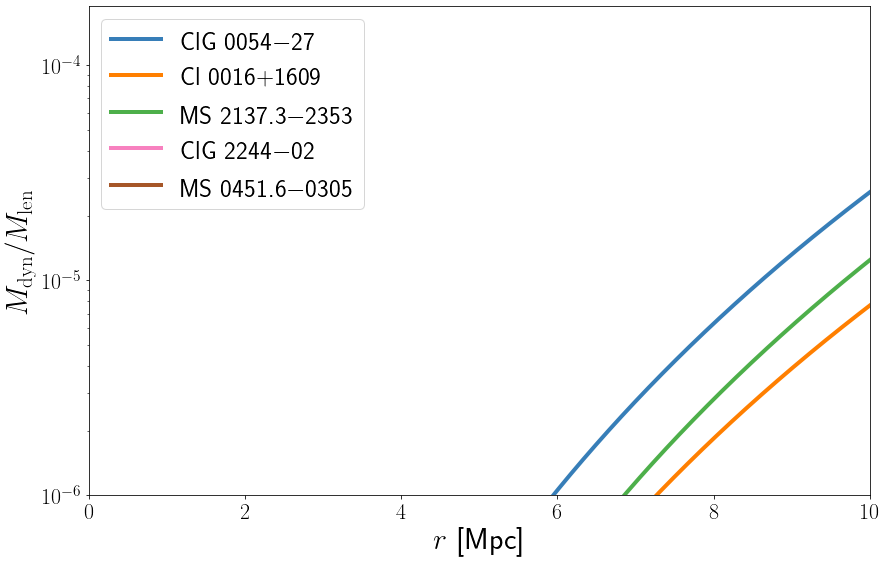

Running simulation 1/5
Running simulation 2/5
Running simulation 3/5
Running simulation 4/5
Running simulation 5/5
Waiting for subprocesses to finish (5/5)
Saving results


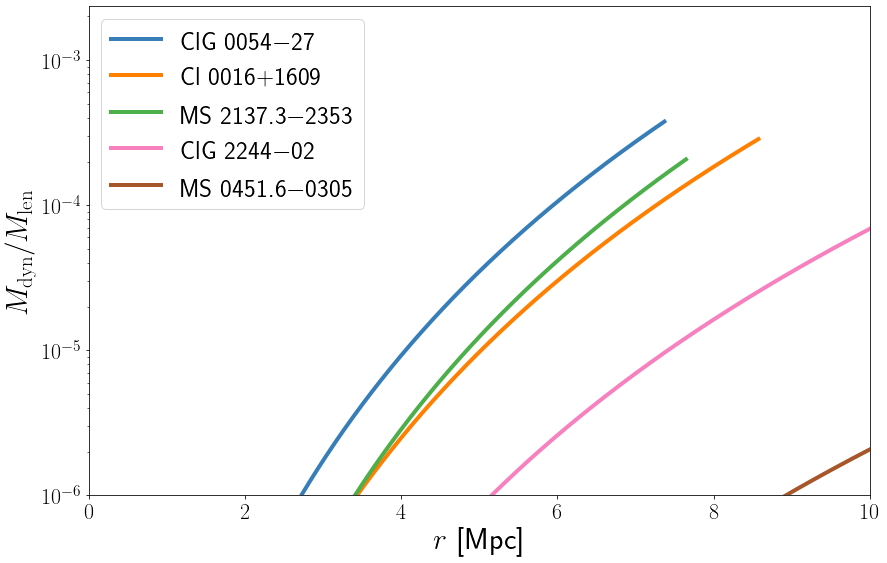

Running simulation 1/5
Running simulation 2/5
Running simulation 3/5
Running simulation 4/5
Running simulation 5/5
Waiting for subprocesses to finish (5/5)
Saving results


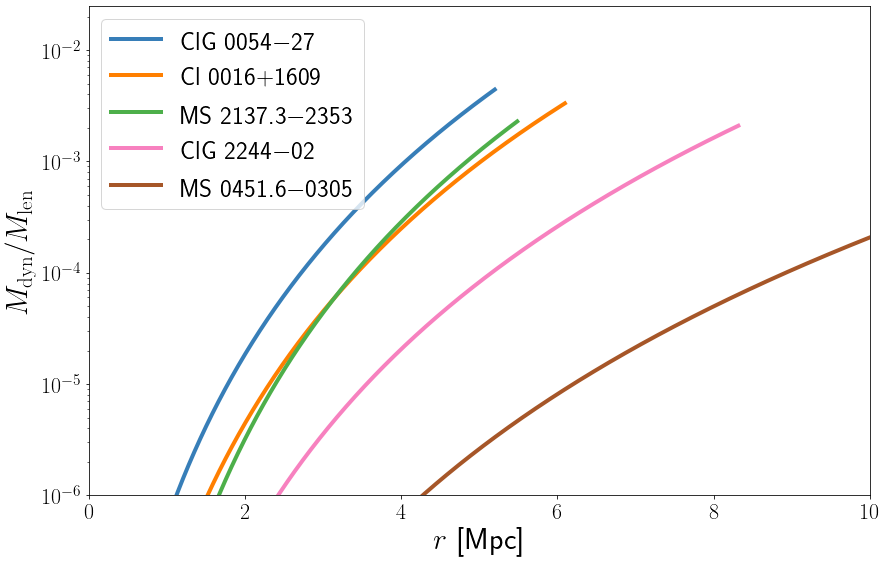

Running simulation 1/5
Running simulation 2/5
Running simulation 3/5
Running simulation 4/5
Running simulation 5/5
Waiting for subprocesses to finish (5/5)
Saving results


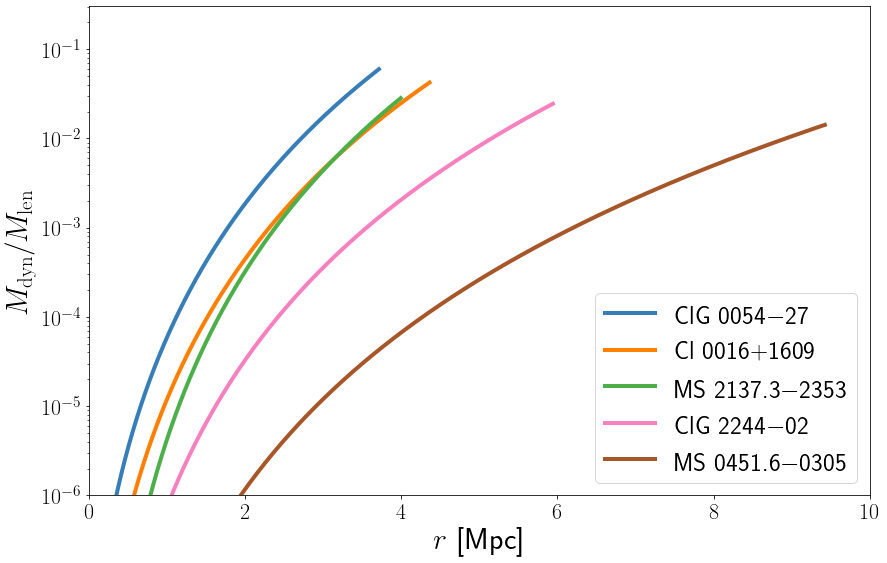

In [8]:
run_chi.main()

# Run many simulations

In [122]:
kwargs_dflt = {
    "err": 1E-14,
    "n": 0.5,
    "print_par" : 1,
    "out_dir" : "../output/",
    "step": 1E-3,
    "mod" : 1,
    "Omega_m" : 1.0,
    "Ys" : 1E-6
}

# kwargs_sims = {
#     "c" : [2],
#     "n": [0.5],
#     "M200_sun" : [1e2,],
#     "Ys" : [1E-6, 1E-4, 1E-2],
# }

kwargs_sims = [
    {
        "label": "ClG 0054−27",
        "c" : 1.2,
        "M200_sun": 0.42E2,
    },
    {
        "label": "Cl 0016+1609",
        "c" : 2.1,
        "M200_sun": 1.12E2,
    },
    {
        "label": "MS 2137.3−2353",
        "c" : 13,
        "M200_sun": 2.9E2,
    },
    {
        "label": "ClG 2244−02",
        "c" : 4.3,
        "M200_sun": 4.5E2,
    },
    {
        "label": "MS 0451.6−0305",
        "c" : 5.5,
        "M200_sun": 18E2,
    },
]

In [123]:
results_all = sim_chi.run_many_sims(kwargs_dflt, kwargs_sims, stdout=None, parallel=True)

Running simulation 1/5
Running simulation 2/5
Running simulation 3/5
Running simulation 4/5
Running simulation 5/5
Waiting for subprocesses to finish (5/5)
Saving results


# Plots

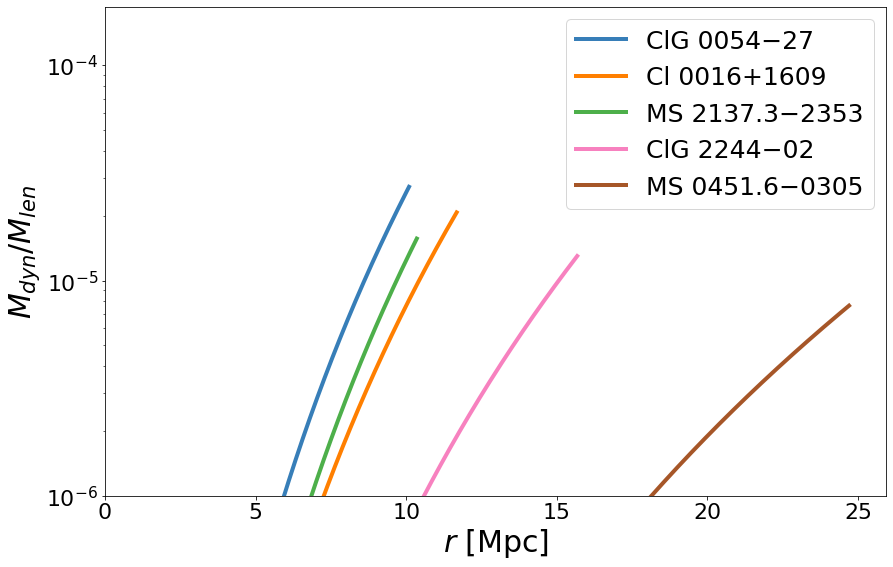

In [128]:
%matplotlib inline
# extract data, set labels
data_all = {}
for sim in sim_chi.find_simulations(results_all):
    halo_mass_function = units.get_halo_mass_function(sim['params'])
    r = sim['forces'][0] * sim['params']['R_s'] / 1000
    eff = get_eff_mlt(sim['forces'])
    cut = np.argmax(eff)
    
    data = r[:cut], eff[:cut]
    
    if 'label' in sim['params']:
        label = sim['params']['label']# + f"$c = {c}, M = {M200_sun / 100}\\cdot10^{{14}}M_\\odot$"
    else:
        M200_sun = sim['params']['M200_sun']
        c = sim['params']['c']
        Ys = int(np.log10(sim['params']['Ys']))

        label = f"$\Phi_{{scr}} = 10^{{{Ys}}}$"
    #     label = f"$M = {M200_sun}\\cdot10^{{12}}M_\\odot, \Phi_{{scr}} = 10^{{{Ys}}}$"
    #     label = f"c = {c}"
    
    data_all[label] = data


plt_chi.plot_generic(data_all, yscale='log', ymin=1E-6, xmin=0, xscale='linear', xlabel=u'$r$ [Mpc]',
             ylabel=u'$M_{dyn}/M_{len}$')

In [126]:
[x['params'] for x in results_all]

[{'label': 'ClG 0054−27',
  'c': 1.2,
  'M200_sun': 42.0,
  'rho_0': 125.59487203418804,
  'rho_c': 59540.58295050407,
  'R_s': 613.5806848661769},
 {'label': 'Cl 0016+1609',
  'c': 2.1,
  'M200_sun': 112.0,
  'rho_0': 125.59487203418804,
  'rho_c': 170804.44765280126,
  'R_s': 486.2092406579971},
 {'label': 'MS 2137.3−2353',
  'c': 13,
  'M200_sun': 290.0,
  'rho_0': 125.59487203418804,
  'rho_c': 10754524.340743285,
  'R_s': 107.8514055722791},
 {'label': 'ClG 2244−02',
  'c': 4.3,
  'M200_sun': 450.0,
  'rho_0': 125.59487203418804,
  'rho_c': 777349.6782291224,
  'R_s': 377.49008122098815},
 {'label': 'MS 0451.6−0305',
  'c': 5.5,
  'M200_sun': 1800.0,
  'rho_0': 125.59487203418804,
  'rho_c': 1358220.3703585872,
  'R_s': 468.48746432042867}]

array([4.13714333e-10, 8.33502000e-10, 1.25941400e-09, ...,
       2.13043100e-02, 4.67695333e-03, 2.13686267e-04])